In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [210]:
data_frame = pd.read_csv("./bmi.csv")
data_frame.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [211]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [212]:
data_frame.shape

(500, 4)

In [213]:
data_frame.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


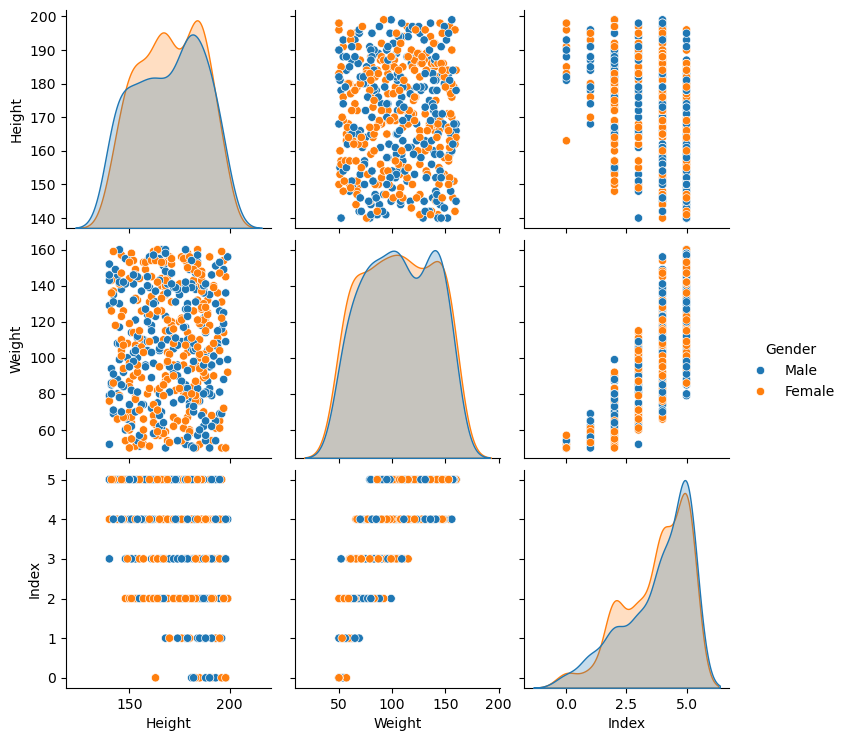

In [214]:
sns.pairplot(data= data_frame, hue= 'Gender')
plt.show()

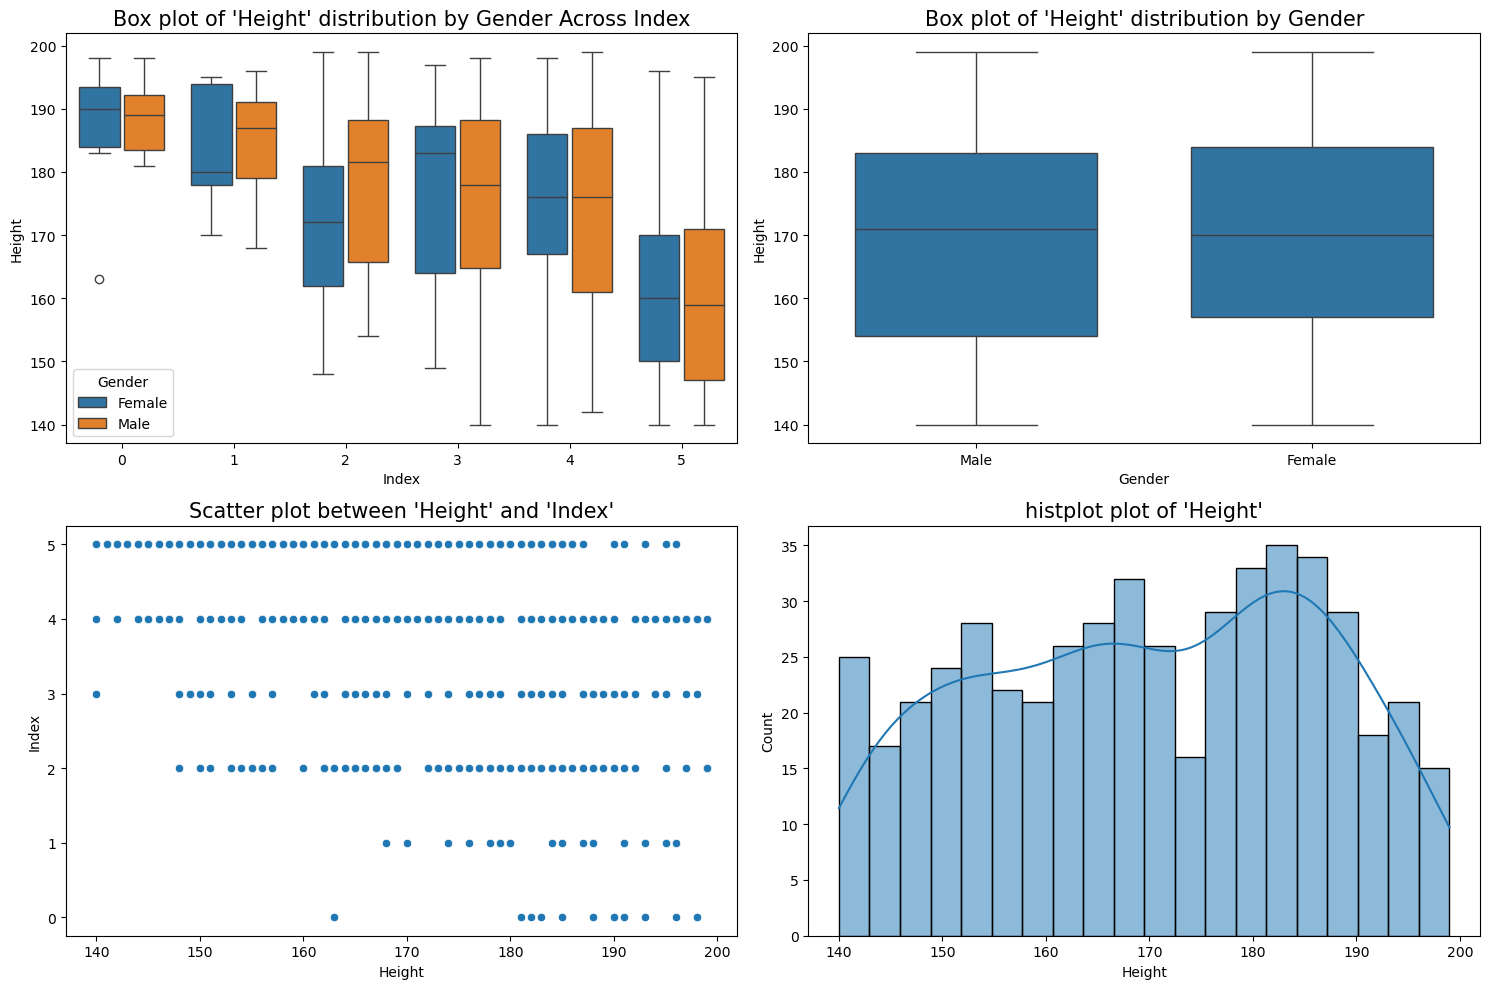

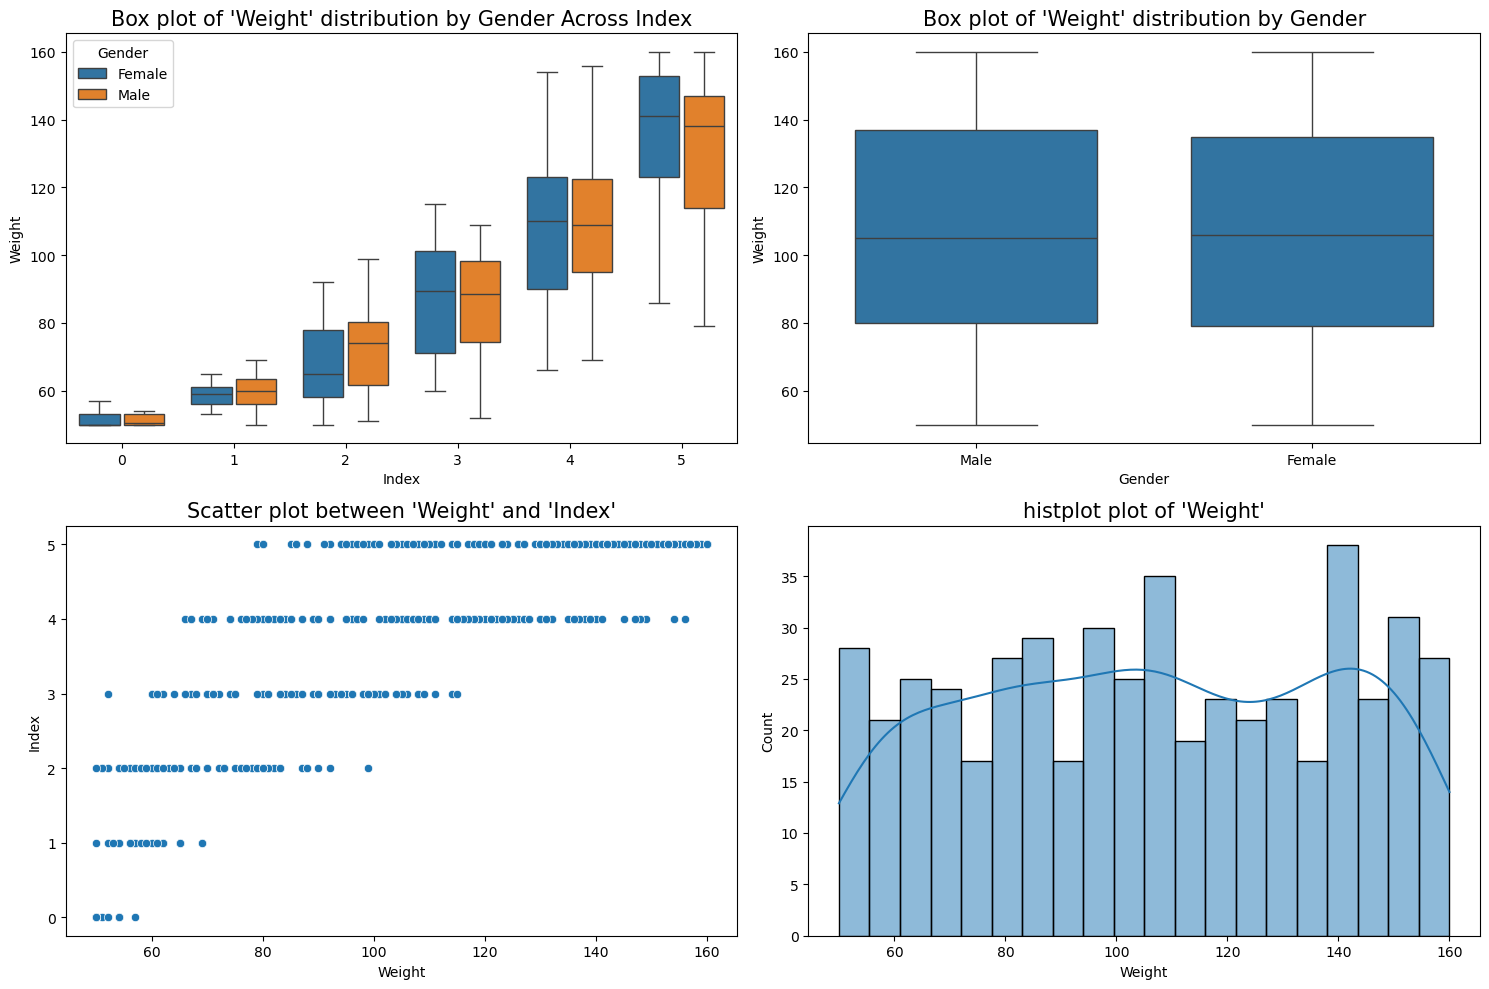

In [215]:
column_names = data_frame.columns

for column_name in column_names:
    if(column_name not in ["Gender", "Index"]):
        fig, axs = plt.subplots(2, 2, figsize = (15, 10))
        sns.boxplot(data= data_frame, y= column_name, x= "Index", hue= "Gender",ax= axs[0, 0], gap= 0.1)
        axs[0, 0].set_title(f"Box plot of '{column_name}' distribution by Gender Across Index", fontsize = 15)

        sns.boxplot(data= data_frame, y= column_name, x= "Gender", ax= axs[0, 1], gap= 0.1)
        axs[0, 1].set_title(f"Box plot of '{column_name}' distribution by Gender", fontsize = 15)

        sns.scatterplot(data= data_frame, x= column_name, y= "Index" , ax = axs[1, 0])
        axs[1, 0].set_title(f"Scatter plot between '{column_name}' and 'Index'", fontsize = 15)

        sns.histplot(data= data_frame, x= column_name, kde=True,bins = 20, ax = axs[1, 1])
        axs[1, 1].set_title(f"histplot plot of '{column_name}'", fontsize = 15)

        plt.tight_layout()
        plt.show()

In [216]:
correlation_matrix = data_frame.corr(method= "pearson", numeric_only= True)
correlation_matrix

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


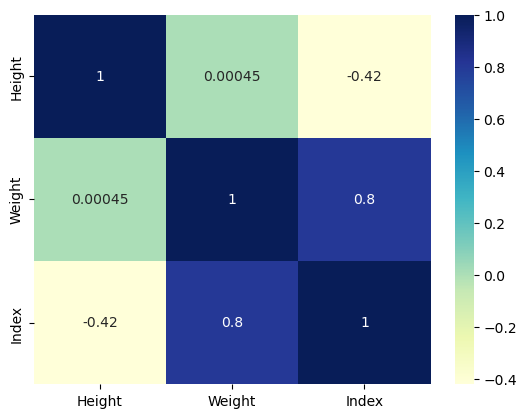

In [217]:
sns.heatmap(data= correlation_matrix, annot= True, cmap= "YlGnBu")
plt.show()

In [218]:
gender_value_count= data_frame["Gender"].value_counts()
gender_value_count

Gender
Female    255
Male      245
Name: count, dtype: int64

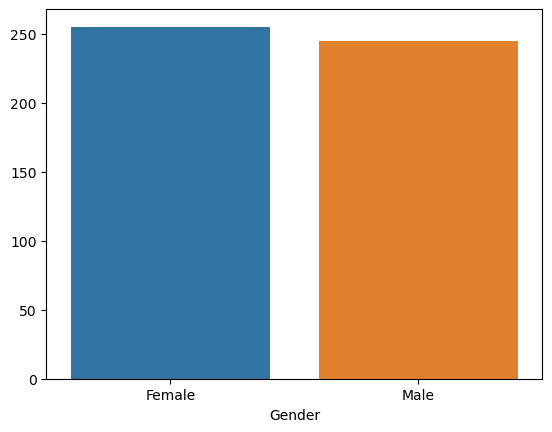

In [219]:
sns.barplot(
    x= gender_value_count.index, 
    y= gender_value_count.values, 
    hue= gender_value_count.index)
plt.show()

In [220]:
bmi_index_count = data_frame["Index"].value_counts()
bmi_index_count

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

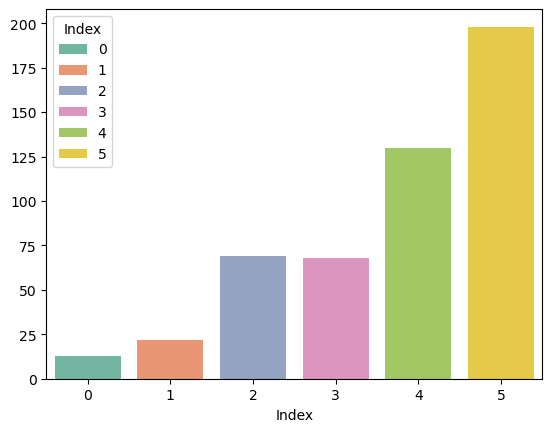

In [221]:
sns.barplot(x= bmi_index_count.index, y= bmi_index_count.values, hue= bmi_index_count.index,
    palette= "Set2")
plt.show()

In [222]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output= False, drop= "first")

encoded_gender = encoder.fit_transform(data_frame[["Gender"]]).astype(int)
df_encoded_gender = pd.DataFrame(data= encoded_gender, columns= encoder.get_feature_names_out())
df_encoded = pd.concat([data_frame.drop(columns= encoder.feature_names_in_), df_encoded_gender], axis= 1)
df_encoded.head()


,Height,Weight,Index,Gender_Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1


In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded.drop(columns= ["Index"]), 
    df_encoded[["Index"]], 
    random_state= 42, 
    test_size= 0.2,
    stratify= df_encoded[["Gender_Male"]]
    )

In [224]:
random_oversampler = RandomOverSampler(random_state=42)
X_random_resampled, y_random_resampled = random_oversampler.fit_resample(X_train, y_train)

In [225]:
X_random_resampled[(X_random_resampled["Gender_Male"] == 0) & ( X_random_resampled["Gender_Male"] == 0)]
X_random_resampled["Gender_Male"].value_counts()

Gender_Male
0    488
1    478
Name: count, dtype: int64

In [226]:
smote_oversampler = SMOTE(random_state= 42)
X_smote_resampled, y_smote_resampled = smote_oversampler.fit_resample(X_train, y_train)

In [227]:
# X_smote_resampled.head(20)
X_smote_resampled["Gender_Male"].value_counts()

Gender_Male
0    566
1    400
Name: count, dtype: int64

Index
4    161
3    161
5    161
0    161
2    161
1    161
Name: count, dtype: int64


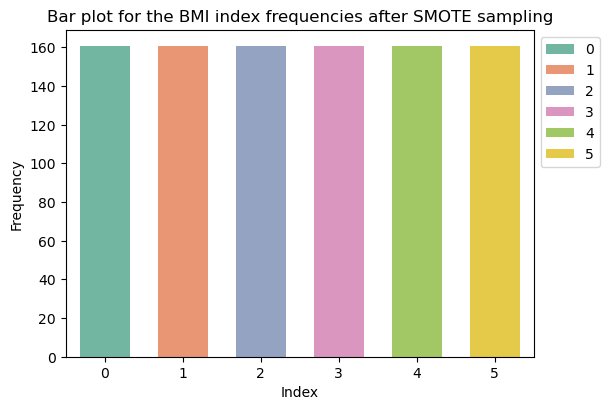

In [228]:
y_sampled_count = y_smote_resampled["Index"].value_counts()
print(y_sampled_count)

# sns.barplot(y= y_sampled_count.values, hue= y_sampled_count.index)
plt.figure(figsize=(6, 4))
sns.barplot(x= y_sampled_count.index, y= y_sampled_count.values, hue= y_sampled_count.index,
    palette= "Set2", gap= 0.2)
plt.legend(loc = "best",  bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.title("Bar plot for the BMI index frequencies after SMOTE sampling")
plt.ylabel("Frequency")
plt.show()

SMOTE resampling requires numeric values for all columns before resampling. So, We had to go with OneHotEncoding for column named "Gender". After resampling, It generates records with both Gender_Male and Gender_Female having same values. As we know one record cannot have both fields set to 0 or 1. 

In [229]:
random_undersampler = RandomUnderSampler(random_state= 42)
X_random_undersampled, y_random_undersampled = random_undersampler.fit_resample(X_train, y_train)

In [243]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()

X_smote_resampled_normalized = min_max_scaler.fit_transform(X_smote_resampled)

standard_scaler = StandardScaler()
X_smote_resampled_standardized = standard_scaler.fit_transform(X_smote_resampled)
# X_smote_resampled_standardized.std()
X_test_standardized = standard_scaler.transform(X_test)


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [244]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_smote_resampled_standardized, y_smote_resampled.values.ravel())

LogisticRegression()

In [247]:
y_pred_logistic_regression = logistic_regression.predict(X_test_standardized)

accuracy_lr = accuracy_score(y_true= y_test, y_pred= y_pred_logistic_regression)
precision_lr = precision_score(y_true= y_test, y_pred= y_pred_logistic_regression, average= None)
recall_lr = recall_score(y_true= y_test, y_pred= y_pred_logistic_regression, average= None)
f1_lr = f1_score(y_true= y_test, y_pred= y_pred_logistic_regression, average= None)

print(f"Logistic Regression Accuracy: {accuracy_lr}\n")
print(f"Logistic Regression Precision: {precision_lr}\n")
print(f"Logistic Regression Recall: {recall_lr}\n")
print(f"Logistic Regression F1 Score: {f1_lr}\n")


Logistic Regression Accuracy: 0.82

Logistic Regression Precision: [0.6        0.5        0.78947368 0.64705882 0.84210526 0.97222222]

Logistic Regression Recall: [1.         0.4        0.83333333 0.73333333 0.72727273 0.94594595]

Logistic Regression F1 Score: [0.75       0.44444444 0.81081081 0.6875     0.7804878  0.95890411]



In [ ]:
k_nearest_neighbour = KNeighborsClassifier(n_neighbors= 10)
k_nearest_neighbour.fit(X_smote_resampled_standardized, y_smote_resampled.values.ravel())

In [248]:
y_pred_knn = k_nearest_neighbour.predict(X_test_standardized)
accuracy_knn = accuracy_score(y_true= y_test, y_pred= y_pred_knn)
precision_knn = precision_score(y_true= y_test, y_pred= y_pred_knn, average= None)
recall_knn = recall_score(y_true= y_test, y_pred= y_pred_knn, average= None)
f1_knn = f1_score(y_true= y_test, y_pred= y_pred_knn, average= None)

print(f"K Nearest Neighbour Accuracy: {accuracy_knn}\n")
print(f"K Nearest Neighbour Precision: {precision_knn}\n")
print(f"K Nearest Neighbour Recall: {recall_knn}\n")
print(f"K Nearest Neighbour F1 Score: {f1_knn}\n")

K Nearest Neighbour Accuracy: 0.82

K Nearest Neighbour Precision: [0.75       0.44444444 0.81818182 0.64705882 0.83333333 1.        ]

K Nearest Neighbour Recall: [1.         0.8        0.5        0.73333333 0.90909091 0.94594595]

K Nearest Neighbour F1 Score: [0.85714286 0.57142857 0.62068966 0.6875     0.86956522 0.97222222]



In [ ]:
support_vector_machine = svm.SVC(kernel='linear', random_state=42)
support_vector_machine.fit(X_smote_resampled_standardized, y_smote_resampled.values.ravel())


In [249]:
y_pred_svc = support_vector_machine.predict(X_test_standardized)
accuracy_svc = accuracy_score(y_true= y_test, y_pred= y_pred_svc)
precision_svc = precision_score(y_true= y_test, y_pred= y_pred_svc, average= None)
recall_svc = recall_score(y_true= y_test, y_pred= y_pred_svc, average= None)
f1_svc = f1_score(y_true= y_test, y_pred= y_pred_svc, average= None)

print(f"Support Vector Machine Accuracy: {accuracy_svc}\n")
print(f"Support Vector Machine Precision: {precision_svc}\n")
print(f"Support Vector Machine Recall: {recall_svc}\n")
print(f"Support Vector Machine F1 Score: {f1_svc}\n")

Support Vector Machine Accuracy: 0.9

Support Vector Machine Precision: [1.         0.71428571 0.9375     0.72222222 0.9        1.        ]

Support Vector Machine Recall: [1.         1.         0.83333333 0.86666667 0.81818182 0.97297297]

Support Vector Machine F1 Score: [1.         0.83333333 0.88235294 0.78787879 0.85714286 0.98630137]



# Gender Specific classification models

In [263]:
#dataframe for male 
df_male = data_frame[data_frame["Gender"] == "Male"].drop(columns= ["Gender"]).reset_index(drop= True)
df_male.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,149,61,3
3,189,104,3
4,147,92,5


In [273]:
df_male.shape

(245, 3)

In [269]:
df_male_value_count= df_male["Index"].value_counts().sort_values()
df_male_value_count

Index
0      6
1     15
2     28
3     32
4     59
5    105
Name: count, dtype: int64

<Axes: xlabel='Index'>

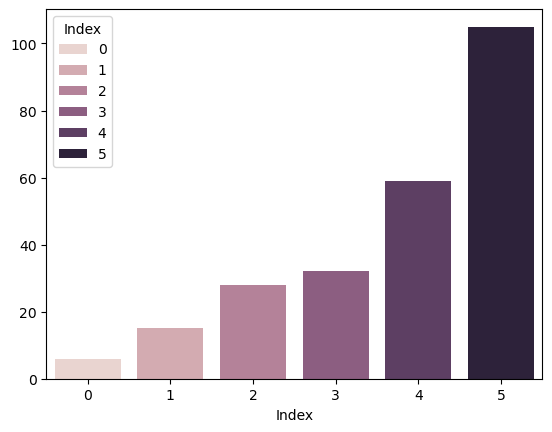

In [271]:
sns.barplot(x = df_male_value_count.index, y = df_male_value_count.values, hue= df_male_value_count.index)

In [282]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(
    df_male.drop(columns= ["Index"]), 
    df_male[["Index"]], 
    test_size= 0.2,
    stratify= df_male[["Index"]]
    )

print(y_male_train["Index"].value_counts().sort_values())

Index
0     5
1    12
2    22
3    26
4    47
5    84
Name: count, dtype: int64


In [287]:
#SMOTE oversampling
smote_oversampler_male = SMOTE(random_state= 42, k_neighbors= 4)
X_smote_resampled_male, y_smote_resampled_male = smote_oversampler_male.fit_resample(X_male_train, y_male_train)

In [288]:
y_smote_resampled_male.value_counts().sort_index()

Index
0        84
1        84
2        84
3        84
4        84
5        84
Name: count, dtype: int64

In [293]:
standard_scaler_male = StandardScaler()
X_smote_resampled_male_standardized = standard_scaler_male.fit_transform(X_smote_resampled_male)
# X_smote_resampled_standardized.std()
X_male_test_standardized = standard_scaler_male.transform(X_male_test)

In [294]:
logistic_regression_male = LogisticRegression()
logistic_regression_male.fit(X_smote_resampled_male_standardized, y_smote_resampled_male.values.ravel())

LogisticRegression()

In [296]:
y_pred_male_logistic_regression = logistic_regression_male.predict(X_male_test_standardized)

accuracy_lr_male = accuracy_score(y_true= y_male_test, y_pred= y_pred_male_logistic_regression)
precision_lr_male = precision_score(y_true= y_male_test, y_pred= y_pred_male_logistic_regression, average= None)
recall_lr_male = recall_score(y_true= y_male_test, y_pred= y_pred_male_logistic_regression, average= None)
f1_lr_male = f1_score(y_true= y_male_test, y_pred= y_pred_male_logistic_regression, average= None)

print(f"Male Logistic Regression Accuracy: {accuracy_lr_male}\n")
print(f"Male Logistic Regression Precision: {precision_lr_male}\n")
print(f"Male Logistic Regression Recall: {recall_lr_male}\n")
print(f"Male Logistic Regression F1 Score: {f1_lr_male}\n")

Male Logistic Regression Accuracy: 0.9387755102040817

Male Logistic Regression Precision: [1.         0.75       1.         1.         0.91666667 0.95238095]

Male Logistic Regression Recall: [1.         1.         0.83333333 1.         0.91666667 0.95238095]

Male Logistic Regression F1 Score: [1.         0.85714286 0.90909091 1.         0.91666667 0.95238095]



In [297]:
k_nearest_neighbour_male = KNeighborsClassifier()
k_nearest_neighbour_male.fit(X_smote_resampled_male_standardized, y_smote_resampled_male.values.ravel())

KNeighborsClassifier()

In [298]:
y_pred_male_knn = k_nearest_neighbour_male.predict(X_male_test_standardized)

accuracy_knn_male = accuracy_score(y_true= y_male_test, y_pred= y_pred_male_knn)
precision_knn_male = precision_score(y_true= y_male_test, y_pred= y_pred_male_knn, average= None)
recall_knn_male = recall_score(y_true= y_male_test, y_pred= y_pred_male_knn, average= None)
f1_knn_male = f1_score(y_true= y_male_test, y_pred= y_pred_male_knn, average= None)

print(f"Male Logistic Regression Accuracy: {accuracy_knn_male}\n")
print(f"Male Logistic Regression Precision: {precision_knn_male}\n")
print(f"Male Logistic Regression Recall: {recall_knn_male}\n")
print(f"Male Logistic Regression F1 Score: {f1_knn_male}\n")

Male Logistic Regression Accuracy: 0.9387755102040817

Male Logistic Regression Precision: [1.         0.75       1.         0.85714286 0.92307692 1.        ]

Male Logistic Regression Recall: [1.         1.         0.66666667 1.         1.         0.95238095]

Male Logistic Regression F1 Score: [1.         0.85714286 0.8        0.92307692 0.96       0.97560976]



In [299]:
support_vector_machine_male = svm.SVC()
support_vector_machine_male.fit(X_smote_resampled_male_standardized, y_smote_resampled_male.values.ravel())

SVC()

In [300]:
y_pred_male_svm = support_vector_machine_male.predict(X_male_test_standardized)

accuracy_svm_male = accuracy_score(y_true= y_male_test, y_pred= y_pred_male_svm)
precision_svm_male = precision_score(y_true= y_male_test, y_pred= y_pred_male_svm, average= None)
recall_svm_male = recall_score(y_true= y_male_test, y_pred= y_pred_male_svm, average= None)
f1_svm_male = f1_score(y_true= y_male_test, y_pred= y_pred_male_svm, average= None)

print(f"Male Logistic Regression Accuracy: {accuracy_svm_male}\n")
print(f"Male Logistic Regression Precision: {precision_svm_male}\n")
print(f"Male Logistic Regression Recall: {recall_svm_male}\n")
print(f"Male Logistic Regression F1 Score: {f1_svm_male}\n")

Male Logistic Regression Accuracy: 0.9387755102040817

Male Logistic Regression Precision: [1.         0.75       1.         1.         0.85714286 1.        ]

Male Logistic Regression Recall: [1.         1.         0.83333333 1.         1.         0.9047619 ]

Male Logistic Regression F1 Score: [1.         0.85714286 0.90909091 1.         0.92307692 0.95      ]



# Classification Models for Female

In [308]:
#dataframe for male 
df_female = data_frame[data_frame["Gender"] == "Female"].drop(columns= ["Gender"]).reset_index(drop= True)
df_female.head()

,Height,Weight,Index
0,185,110,4
1,195,104,3
2,169,103,4
3,159,80,4
4,192,101,3


In [309]:
df_female.shape

(255, 3)

In [310]:
df_female_value_count= df_female["Index"].value_counts().sort_values()
df_female_value_count

Index
1     7
0     7
3    36
2    41
4    71
5    93
Name: count, dtype: int64

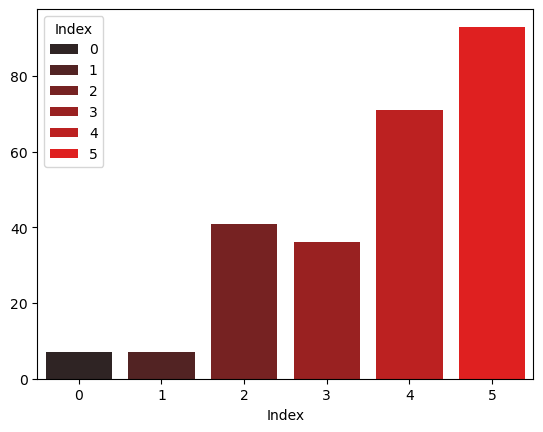

In [314]:
sns.barplot(x = df_female_value_count.index, y = df_female_value_count.values, hue= df_female_value_count.index, palette='dark:red')
plt.show()

In [315]:
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(
    df_female.drop(columns= ["Index"]), 
    df_female[["Index"]], 
    test_size= 0.2,
    stratify= df_female[["Index"]]
    )

print(y_female_train["Index"].value_counts().sort_values())

Index
0     5
1     6
3    29
2    33
4    57
5    74
Name: count, dtype: int64


In [316]:
#SMOTE oversampling
smote_oversampler_female = SMOTE(random_state= 42, k_neighbors= 4)
X_smote_resampled_female, y_smote_resampled_female = smote_oversampler_female.fit_resample(X_female_train, y_female_train)

In [317]:
y_smote_resampled_female.value_counts().sort_index()

Index
0        74
1        74
2        74
3        74
4        74
5        74
Name: count, dtype: int64

In [318]:
standard_scaler_female = StandardScaler()
X_smote_resampled_female_standardized = standard_scaler_female.fit_transform(X_smote_resampled_female)
# X_smote_resampled_standardized.std()
X_female_test_standardized = standard_scaler_female.transform(X_female_test)

In [319]:
logistic_regression_female = LogisticRegression()
logistic_regression_female.fit(X_smote_resampled_female_standardized, y_smote_resampled_female.values.ravel())

LogisticRegression()

In [320]:
y_pred_female_logistic_regression = logistic_regression_female.predict(X_female_test_standardized)

accuracy_lr_female = accuracy_score(y_true= y_female_test, y_pred= y_pred_female_logistic_regression)
precision_lr_female = precision_score(y_true= y_female_test, y_pred= y_pred_female_logistic_regression, average= None)
recall_lr_female = recall_score(y_true= y_female_test, y_pred= y_pred_female_logistic_regression, average= None)
f1_lr_female = f1_score(y_true= y_female_test, y_pred= y_pred_female_logistic_regression, average= None)

print(f"Female Logistic Regression Accuracy: {accuracy_lr_female}\n")
print(f"Female Logistic Regression Precision: {precision_lr_female}\n")
print(f"Female Logistic Regression Recall: {recall_lr_female}\n")
print(f"Female Logistic Regression F1 Score: {f1_lr_female}\n")

Female Logistic Regression Accuracy: 0.8235294117647058

Female Logistic Regression Precision: [0.66666667 1.         0.8        0.6        0.78571429 1.        ]

Female Logistic Regression Recall: [1.         1.         0.5        0.85714286 0.78571429 0.94736842]

Female Logistic Regression F1 Score: [0.8        1.         0.61538462 0.70588235 0.78571429 0.97297297]



In [323]:
k_nearest_neighbour_female = KNeighborsClassifier()
k_nearest_neighbour_female.fit(X_smote_resampled_female_standardized, y_smote_resampled_female.values.ravel())

KNeighborsClassifier()

In [330]:
y_pred_female_knn = k_nearest_neighbour_female.predict(X_female_test_standardized)

accuracy_knn_female = accuracy_score(y_true= y_female_test, y_pred= y_pred_female_knn)
precision_knn_female = precision_score(y_true= y_female_test, y_pred= y_pred_female_knn, average= None)
recall_knn_female = recall_score(y_true= y_female_test, y_pred= y_pred_female_knn, average= None)
f1_knn_female = f1_score(y_true= y_female_test, y_pred= y_pred_female_knn, average= None)

print(f"Female KNN Accuracy: {accuracy_knn_female}\n")
print(f"Female KNNn Precision: {precision_knn_female}\n")
print(f"Female KNN Recall: {recall_knn_female}\n")
print(f"Female KNN F1 Score: {f1_knn_female}\n")

Female KNN Accuracy: 0.8431372549019608

Female KNNn Precision: [0.5        1.         1.         0.85714286 0.73684211 1.        ]

Female KNN Recall: [1.         1.         0.375      0.85714286 1.         0.89473684]

Female KNN F1 Score: [0.66666667 1.         0.54545455 0.85714286 0.84848485 0.94444444]



In [327]:
support_vector_machine_female = svm.SVC()
support_vector_machine_female.fit(X_smote_resampled_female_standardized, y_smote_resampled_female.values.ravel())

SVC()

In [329]:
y_pred_female_svm = support_vector_machine_female.predict(X_female_test_standardized)

accuracy_svm_female = accuracy_score(y_true= y_female_test, y_pred= y_pred_female_svm)
precision_svm_female = precision_score(y_true= y_female_test, y_pred= y_pred_female_svm, average= None)
recall_svm_female = recall_score(y_true= y_female_test, y_pred= y_pred_female_svm, average= None)
f1_svm_female = f1_score(y_true= y_female_test, y_pred= y_pred_female_svm, average= None)

print(f"Female Support Vector Machine Accuracy: {accuracy_svm_female}\n")
print(f"Female Support Vector Machine Precision: {precision_svm_female}\n")
print(f"Female Support Vector Machine Recall: {recall_svm_female}\n")
print(f"Female Support Vector Machine F1 Score: {f1_svm_female}\n")

Female Support Vector Machine Accuracy: 0.8823529411764706

Female Support Vector Machine Precision: [0.66666667 1.         1.         0.875      0.77777778 1.        ]

Female Support Vector Machine Recall: [1.         1.         0.5        1.         1.         0.89473684]

Female Support Vector Machine F1 Score: [0.8        1.         0.66666667 0.93333333 0.875      0.94444444]

